# Preparación de los datos

In [1]:
# Importamos librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Para que no se desplieguen las advertencias
warnings.filterwarnings("ignore")

## SIAP

### Cargamos los datos tidy

In [3]:
# Cultivos de interés
cultivos = ['Tomate rojo (jitomate)', 'Chile verde', 'Limón', 'Pepino', 'Plátano', 'Mango', 'Garbanzo', 'Brócoli', 'Cebolla', 'Sandía', 'Papaya', 'Calabacita', 'Lechuga',
            'Tomate verde', 'Espárrago', 'Frambuesa', 'Nopalitos', 'Nuez', 'Fresa', 'Toronja (pomelo)', 'Zarzamora', 'Piña', 'Coliflor', 'Frijol', 'Berenjena', 'Uva', 'Guayaba',
            'Naranja', 'Papa', 'Melón', 'Manzana', 'Pera', 'Durazno']
# Cantidad de cultivos
print(f"Cantidad de cultivos de interés: {len(cultivos)}")

Cantidad de cultivos de interés: 33


In [4]:
# Librería necesaria para cargar parquet
#pip install pyarrow

In [5]:
# URL al archivo parquet en el repositorio
url_siap = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Primera parte\Tidy\SIAP.parquet'
# Cargar archivo parquet como DataFrame
df_siap = pd.read_parquet(url_siap)
# Inspeccionar primeros elementos del DataFrame
df_siap.head()

,Entidad,Municipio,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Rendimiento,Anio,Mes,Cultivo
0,Aguascalientes,Aguascalientes,8.00,0.00,0.0,0.00,0,2023,Enero,Agave
1,Baja California Sur,La Paz,3.00,0.00,0.0,0.00,0,2023,Enero,Agave
2,Colima,Manzanillo,86.29,0.00,0.0,0.00,0,2023,Enero,Agave
3,Durango,Durango,13.00,0.00,0.0,0.00,0,2023,Enero,Agave
4,Durango,Mezquital,110.00,0.00,0.0,0.00,0,2023,Enero,Agave


In [6]:
# Nos quedamos solo con los cultivos de interés
df_siap = df_siap[df_siap['Cultivo'].isin(cultivos)]

### Dimensiones de nuestros datos

In [7]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_siap.shape}\n")

Dimensión de los datos: (582752, 10)



### Tipo de dato de cada variable

In [8]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_siap.dtypes}\n")

Tipo de dato de cada variable:
 Entidad                    object
Municipio                  object
Superficie Sembrada        object
Superficie Cosechada       object
Superficie Siniestrada    float64
Produccion                 object
Rendimiento                object
Anio                        int64
Mes                        object
Cultivo                    object
dtype: object



(Notamos que las variables *Superficie Sembrada*, *Superficie Cosechada*, *Producción* y *Rendimiento* son de tipo **object**, pese a que su valor es numérico)

Convertimos estas variables object a flotantes

In [9]:
# Lista de variables a convertir
obj_to_float_var = ['Superficie Sembrada', 'Superficie Cosechada', 'Produccion', 'Rendimiento']
# Eliminación de ',' character y conversión a flotante
for var in obj_to_float_var:
    df_siap[var] = df_siap[var].str.replace(',','').astype('float')

Re-evaluamos los tipos de datos

In [10]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_siap.dtypes}\n")

Tipo de dato de cada variable:
 Entidad                    object
Municipio                  object
Superficie Sembrada       float64
Superficie Cosechada      float64
Superficie Siniestrada    float64
Produccion                float64
Rendimiento               float64
Anio                        int64
Mes                        object
Cultivo                    object
dtype: object



### Estadísticos descriptivos de nuestros datos

In [11]:
# Estadísticos descriptivos ignorando la columna Anio
df_siap.loc[:, df_siap.columns != 'Anio'].describe().applymap('{:,.2f}'.format)

,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Rendimiento
count,"582,752.00","582,752.00","582,464.00","582,752.00","582,752.00"
mean,299.44,166.83,0.73,"2,123.56",12.91
std,"1,823.73","1,146.69",15.35,"12,587.49",29.02
min,0.00,0.00,0.00,0.00,0.00
25%,7.00,0.00,0.00,0.00,0.00
50%,24.00,5.50,0.00,37.40,3.16
75%,100.00,40.00,0.00,416.00,15.40
max,"120,900.00","119,950.00",990.00,"794,461.81",696.43


### Valores faltantes

In [12]:
# Valores faltantes
print(f"Valores faltantes:\n {df_siap.isna().sum()}")

Valores faltantes:
 Entidad                     0
Municipio                   0
Superficie Sembrada         0
Superficie Cosechada        0
Superficie Siniestrada    288
Produccion                  0
Rendimiento                 0
Anio                        0
Mes                         0
Cultivo                     0
dtype: int64


### Datos repetidos

In [13]:
# Filas repetidas
print(f"Cantidad de filas repetidas: {df_siap.duplicated().sum()}")

Cantidad de filas repetidas: 0


### Pandas profiling

In [14]:
# Código para obtener un super resumen automático de los datos

# ! pip install -U ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

### 1. ¿En qué épocas del año es más probable que se generen excedentes? 

**Producción mensual acumulada**

El SIAP provee los datos de manera mensual acumulada. Es decir, la producción de Febrero contiene la producción de Enero y Febrero. La producción de Marzo contiene la producción de Enero, Febrero y Marzo; y así sucesivamente.  

In [15]:
# Magic command para hacer gráficas interactivas
%matplotlib widget

In [16]:
# Agrupamos por año y por mes, y sumamos la produccion
prod_año_mes = df_siap.groupby(['Anio', 'Mes'])['Produccion'].sum()
prod_año_mes

Anio  Mes       
2018  Abril         10165366.29
      Agosto        21711429.80
      Diciembre     32612489.63
      Enero          1842999.69
      Febrero        4363652.79
                       ...     
2023  Julio         21669332.78
      Junio         18830705.91
      Marzo          8737073.24
      Mayo          15518996.40
      Septiembre    28245742.52
Name: Produccion, Length: 69, dtype: float64

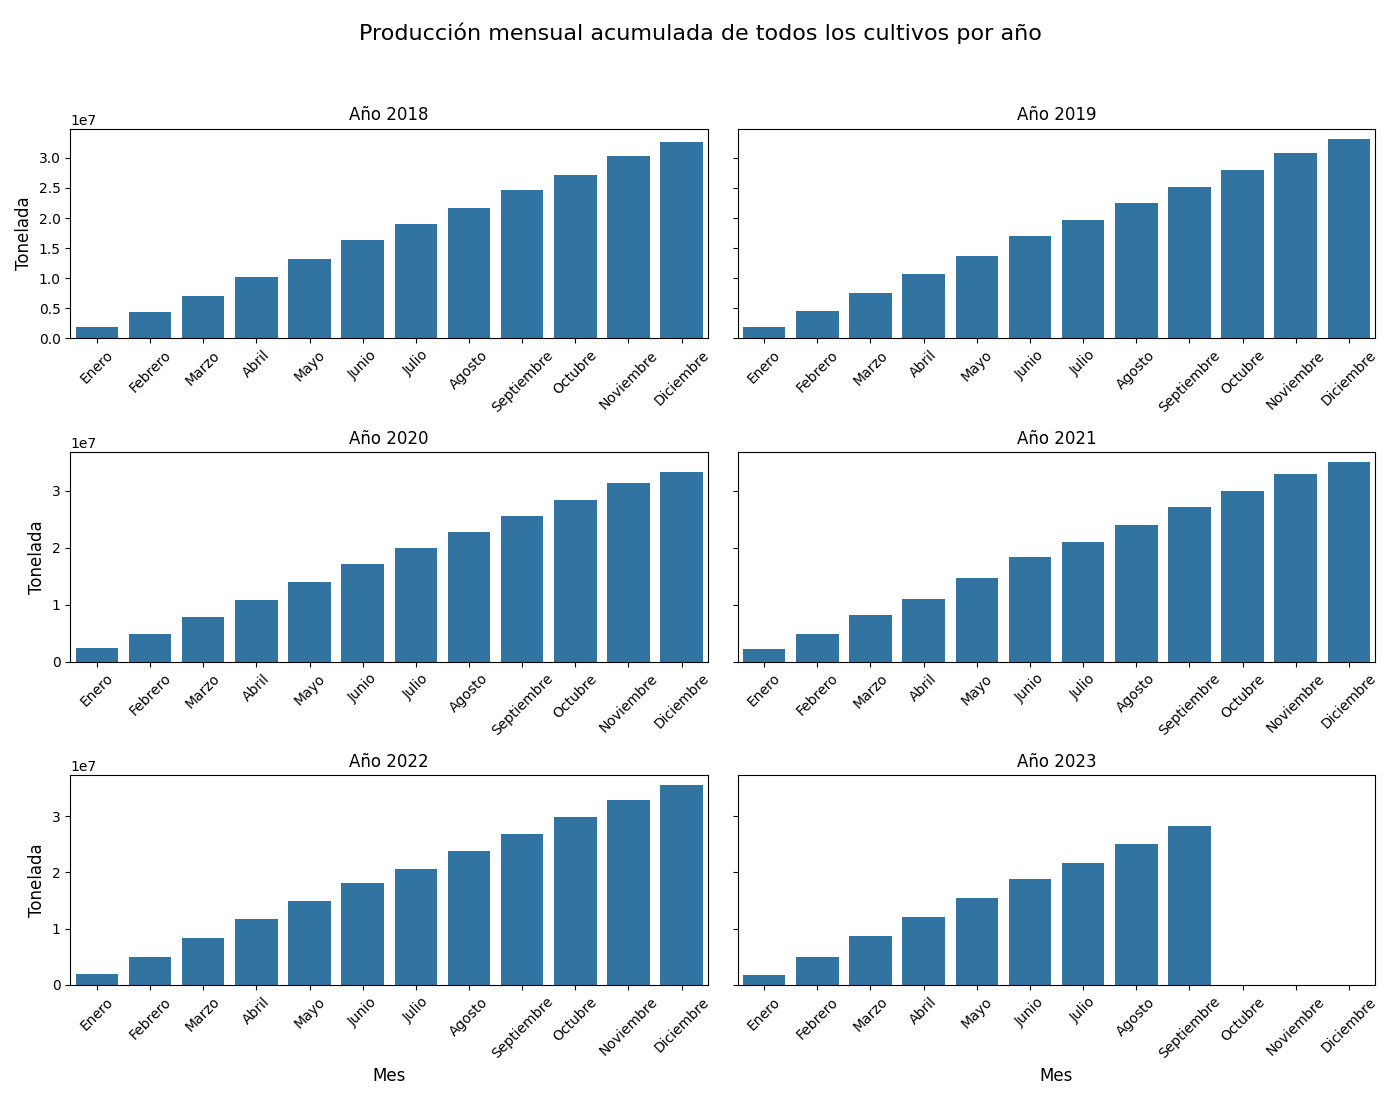

In [17]:
%matplotlib widget
# Crea una figura con una matriz de subgráficas 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 11), sharey='row')
fig.suptitle('Producción mensual acumulada de todos los cultivos por año', fontsize=16)


# Orden cronológico de los meses
meses_cronologico = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

i=0

# Itera a través de los años y crea una subgráfica para cada uno
for year in prod_año_mes.index.get_level_values('Anio').unique():
    row, col = i // 2, i % 2  # Calcula la fila y la columna actual en la matriz de subgráficas
    ax = axes[row, col]  # Selecciona la subgráfica actual
    
    # Filtra los datos para el año actual y reordena los meses cronológicamente
    df_year = prod_año_mes.loc[year].reindex(meses_cronologico)
    
    # Crea un gráfico de barras en la subgráfica actual
    sns.barplot(x=df_year.index, y=df_year.values, ci=None, ax=ax)
    
    # Personaliza la subgráfica
    ax.set_title(f'Año {year}')
    
    # Agrega etiquetas en el eje Y solo a las gráficas de la izquierda
    if col == 0:
        ax.set_ylabel('Tonelada', fontsize=12)

    # Agrega etiquetas en el eje X solo a las gráficas de abajo
    if row == 2:
        ax.set_xlabel('Mes', fontsize=12)
    else:
        ax.set_xlabel('', fontsize=12)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rota las etiquetas del eje X

    i+=1
    
# Ajusta el diseño de las subgráficas
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Muestra la figura
plt.show()

In [18]:
# Función para crear gráfica de un año a la vez
def update_bar_plot(selected_year):
    plt.figure(figsize=(10, 6))
    df_year = prod_año_mes.loc[selected_year].reindex(meses_cronologico)
    sns.barplot(x=df_year.index, y=df_year.values, ci=None)
    plt.title(f'Año {selected_year}')
    plt.xlabel('Mes')
    plt.ylabel('Tonelada')
    plt.xticks(rotation=45)
    plt.subplots_adjust(top=0.95, bottom=0.17)  # Reduce the top margin
    plt.show()

# Widget interactivo para seleccionar el año
year_selector = widgets.Dropdown(options=prod_año_mes.index.get_level_values('Anio').unique(), description='Select Year:')
#year_selector.layout.margin = '-10px -10px -10px -10px'  # Adjust the margin here
output = widgets.interact(update_bar_plot, selected_year=year_selector)

# Desplegar widget interactivo
display(output)

interactive(children=(Dropdown(description='Select Year:', options=(2018, 2019, 2020, 2021, 2022, 2023), value…

<function __main__.update_bar_plot(selected_year)>

**Producción mensual no acumulada**

Para observar la verdadera producción de cada mes, calculamos la producción de cada mes, menos la producción de todos los meses previos.

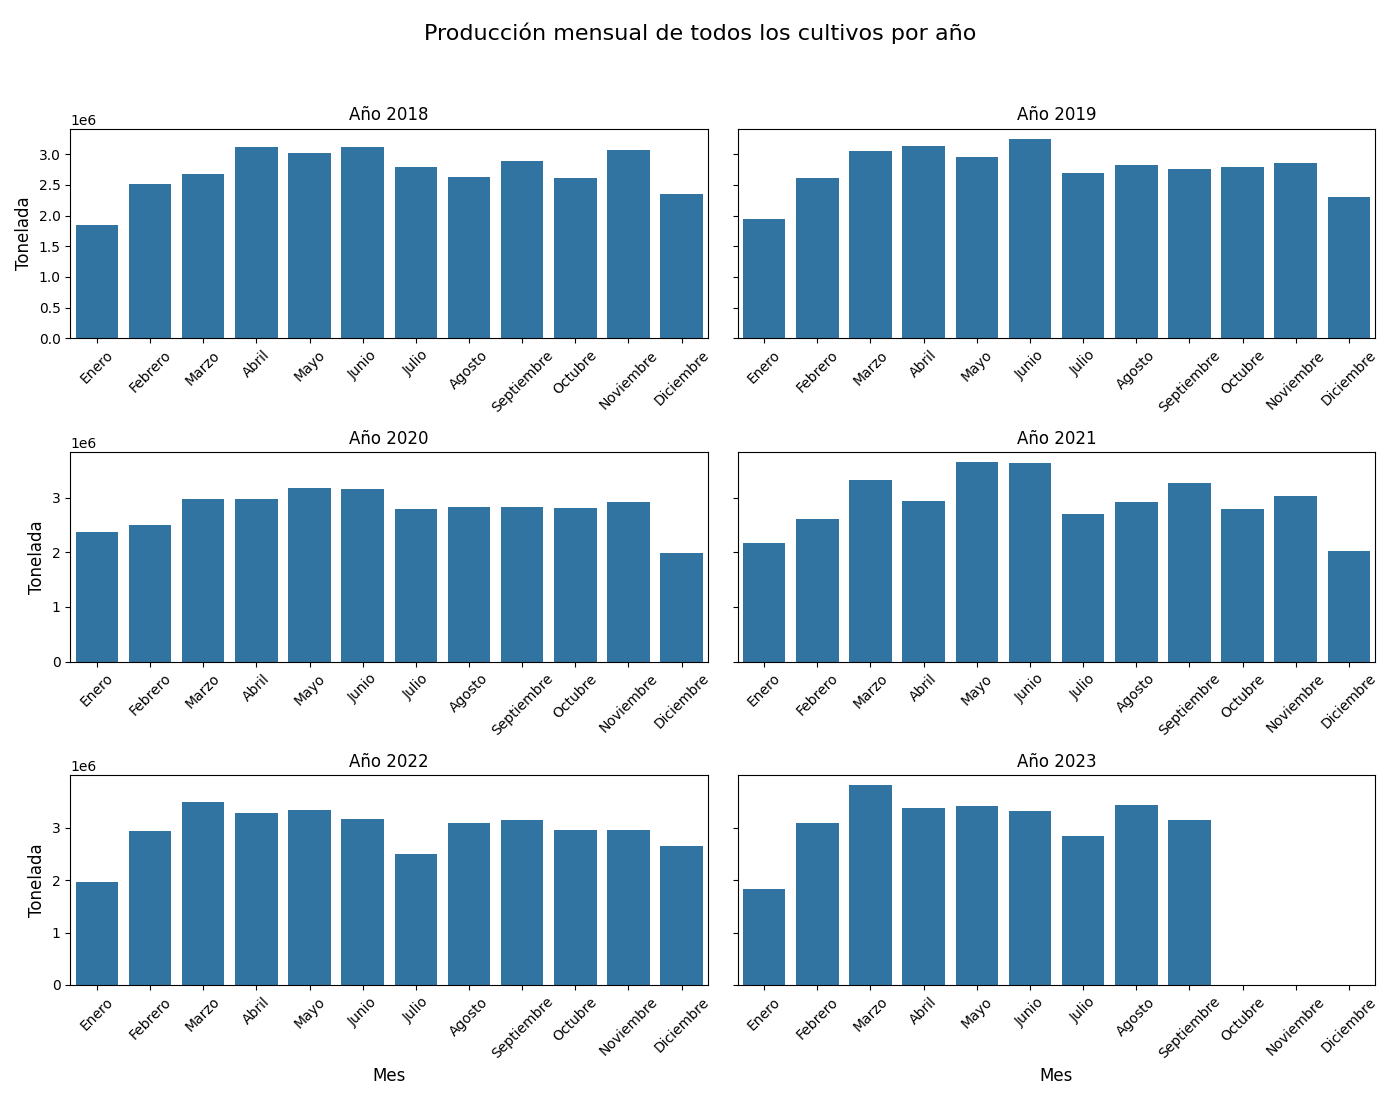

In [19]:
# Crear una figura con una matriz de subgráficas 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 11), sharey='row')
fig.suptitle('Producción mensual de todos los cultivos por año', fontsize=16)

# Orden cronológico de los meses
meses_cronologico = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

i = 0

# Iterar a través de los años y crear una subgráfica para cada uno
for year in prod_año_mes.index.get_level_values('Anio').unique():
    row, col = i // 2, i % 2  # Calcular la fila y la columna actual en la matriz de subgráficas
    ax = axes[row, col]  # Seleccionar la subgráfica actual

    # Filtrar los datos para el año actual y reordenar los meses cronológicamente
    df_year = prod_año_mes.loc[year].reindex(meses_cronologico)
    
    # Calcular la producción mensual sin incluir la de los meses previos
    df_monthly = df_year.diff().fillna(df_year)
    
    # Crear un gráfico de barras en la subgráfica actual
    sns.barplot(x=df_monthly.index, y=df_monthly.values, ci=None, ax=ax)
    
    # Personalizar la subgráfica
    ax.set_title(f'Año {year}')
    
    # Agregar etiquetas en el eje Y solo a las gráficas de la izquierda
    if col == 0:
        ax.set_ylabel('Tonelada', fontsize=12)

    # Agregar etiquetas en el eje X solo a las gráficas de abajo
    if row == 2:
        ax.set_xlabel('Mes', fontsize=12)
    else:
        ax.set_xlabel('', fontsize=12)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje X

    i += 1

# Ajustar el diseño de las subgráficas
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la figura
plt.show()

Gráficamos nuevamente, pero ahora ordenando en términos de producción.

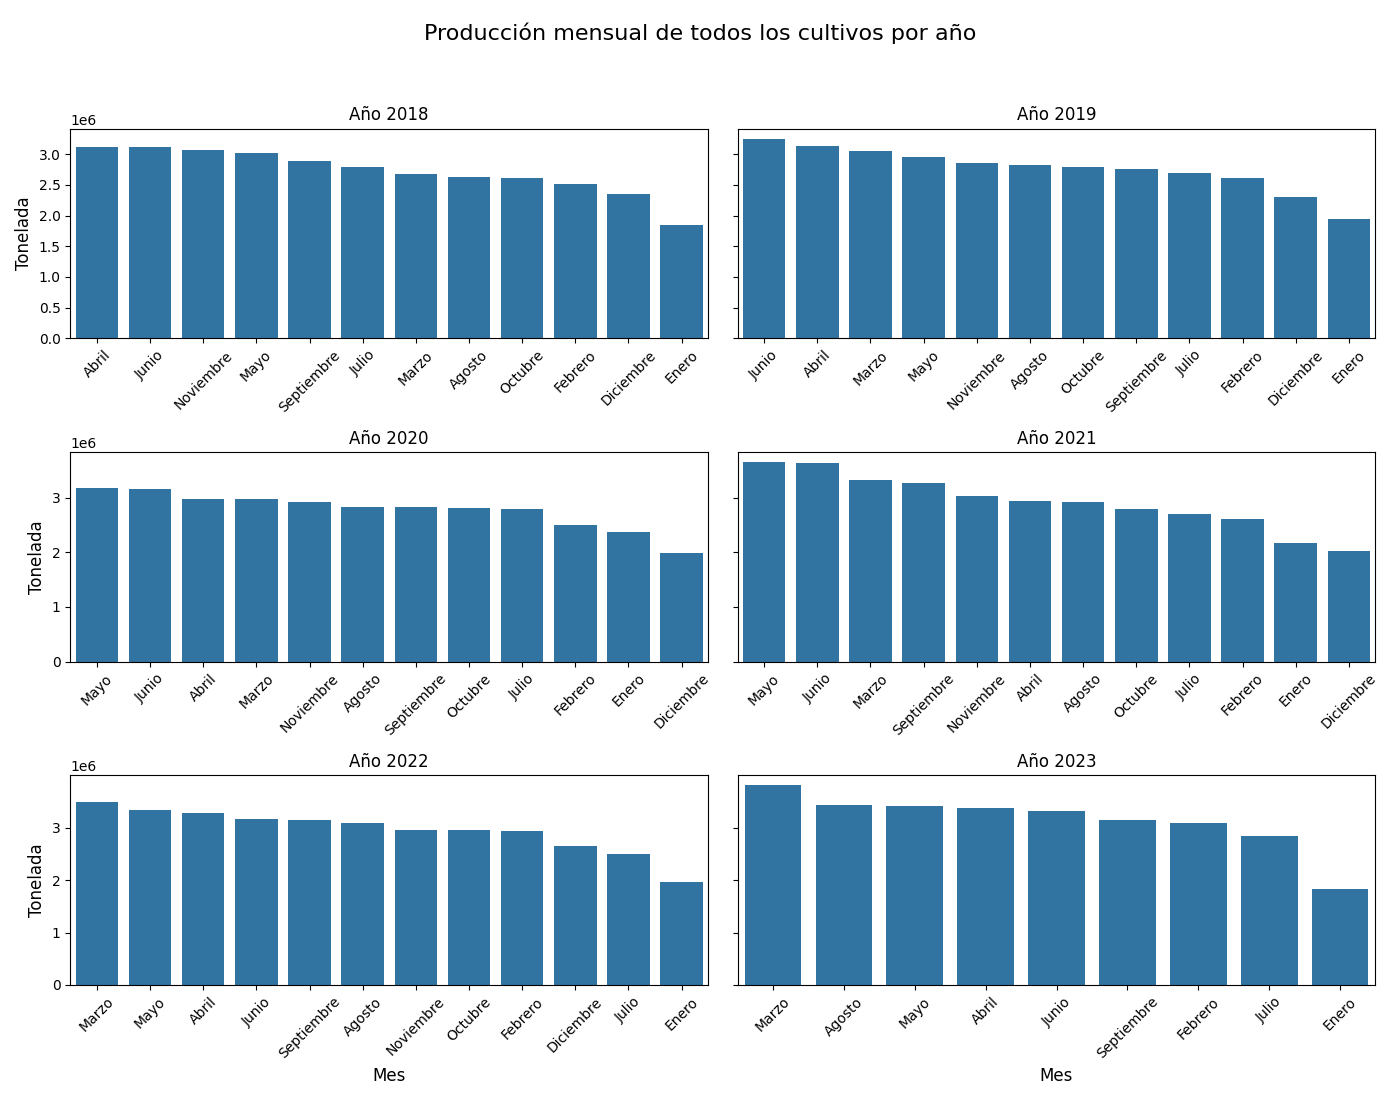

In [20]:
# Crear una figura con una matriz de subgráficas 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 11), sharey='row')
fig.suptitle('Producción mensual de todos los cultivos por año', fontsize=16)

# Orden cronológico de los meses
meses_cronologico = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

i = 0

# Iterar a través de los años y crear una subgráfica para cada uno
for year in prod_año_mes.index.get_level_values('Anio').unique():
    row, col = i // 2, i % 2  # Calcular la fila y la columna actual en la matriz de subgráficas
    ax = axes[row, col]  # Seleccionar la subgráfica actual

    # Filtrar los datos para el año actual y reordenar los meses cronológicamente
    df_year = prod_año_mes.loc[year].sort_values()
    
    # Calcular la producción mensual sin incluir la de los meses previos
    df_monthly = df_year.diff().fillna(df_year).sort_values(ascending=False)
    
    # Crear un gráfico de barras en la subgráfica actual
    sns.barplot(x=df_monthly.index, y=df_monthly.values, ci=None, ax=ax)
    
    # Personalizar la subgráfica
    ax.set_title(f'Año {year}')
    
    # Agregar etiquetas en el eje Y solo a las gráficas de la izquierda
    if col == 0:
        ax.set_ylabel('Tonelada', fontsize=12)

    # Agregar etiquetas en el eje X solo a las gráficas de abajo
    if row == 2:
        ax.set_xlabel('Mes', fontsize=12)
    else:
        ax.set_xlabel('', fontsize=12)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotar las etiquetas del eje X

    i += 1

# Ajustar el diseño de las subgráficas
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la figura
plt.show()

### 2. ¿En qué localidades hay mayor probabilidad de acumulación de excedentes?

**Producción anual por estado**

*Retomando el hecho de que el SIAP arroja la producción de manera acumulativa, para saber la producción que hubo en un año particular basta con extraer la producción asociada al mes de diciembre de dicho año*

In [21]:
# Agrupamos por año y por cultivo, y sumamos la produccion
prod_año_estado = df_siap[df_siap['Mes'] == 'Diciembre'].groupby(['Anio', 'Entidad'])['Produccion'].sum()
prod_año_estado

Anio  Entidad            
2018  Aguascalientes          247491.77
      Baja California         509258.12
      Baja California Sur     381554.74
      Campeche                192757.22
      Chiapas                1408548.91
                                ...    
2022  Tamaulipas             1233951.16
      Tlaxcala                 82497.48
      Veracruz               5435710.51
      Yucatán                 388565.36
      Zacatecas              1601359.47
Name: Produccion, Length: 160, dtype: float64

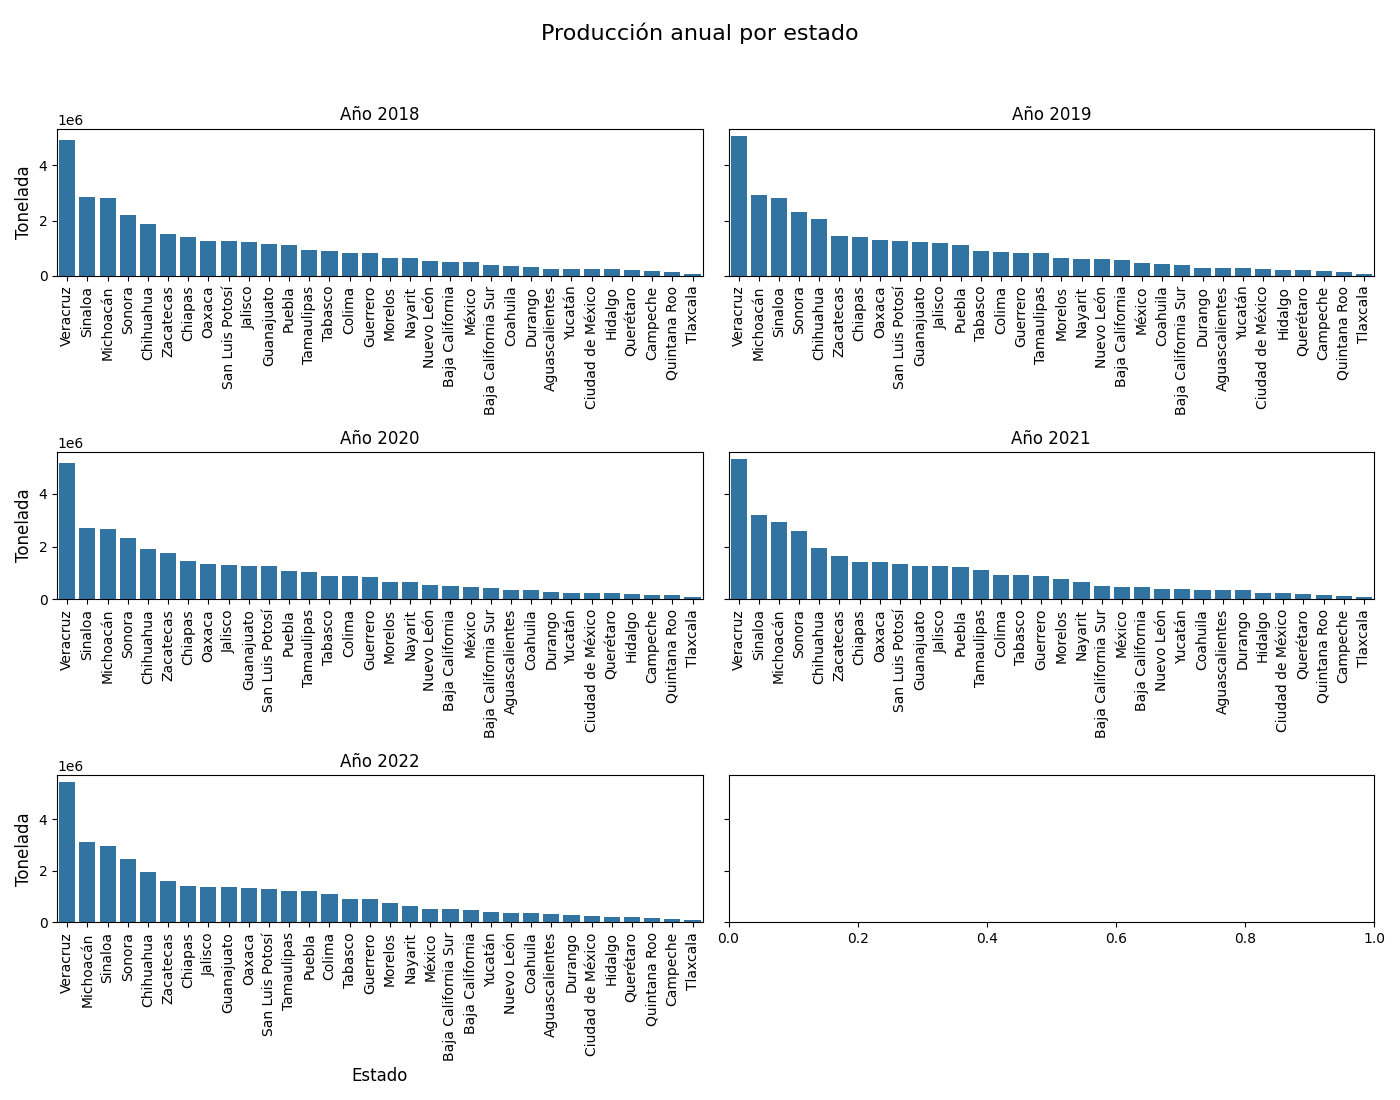

In [22]:
# Crea una figura con una matriz de subgráficas 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 11), sharey='row')
fig.suptitle('Producción anual por estado', fontsize=16)

i=0

# Itera a través de los años y crea una subgráfica para cada uno
for year in prod_año_estado.index.get_level_values('Anio').unique():
    row, col = i // 2, i % 2  # Calcula la fila y la columna actual en la matriz de subgráficas
    ax = axes[row, col]  # Selecciona la subgráfica actual
    
    # Filtra los datos para el año actual y reordena los meses cronológicamente
    df_year = prod_año_estado.loc[year].sort_values(ascending=False)
    
    # Crea un gráfico de barras en la subgráfica actual
    sns.barplot(x=df_year.index, y=df_year.values, ci=None, ax=ax)
    
    # Personaliza la subgráfica
    ax.set_title(f'Año {year}')
    
    # Agrega etiquetas en el eje Y solo a las gráficas de la izquierda
    if col == 0:
        ax.set_ylabel('Tonelada', fontsize=12)

    # Agrega etiquetas en el eje X solo a las gráficas de abajo
    if row == 2:
        ax.set_xlabel('Estado', fontsize=12)
    else:
        ax.set_xlabel('', fontsize=12)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rota las etiquetas del eje X

    i+=1
    
# Ajusta el diseño de las subgráficas
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Muestra la figura
plt.show()

**Producción anual por municipio**

In [23]:
# Agrupamos por año y por cultivo, y sumamos la produccion
prod_est_año_mun = df_siap[df_siap['Mes'] == 'Diciembre'].groupby(['Entidad', 'Anio', 'Municipio'])['Produccion'].sum()
prod_est_año_mun

Entidad         Anio  Municipio            
Aguascalientes  2018  Aguascalientes             5080.86
                      Asientos                  93836.54
                      Calvillo                  70864.10
                      Cosío                     12076.90
                      El Llano                   1595.71
                                                 ...    
Zacatecas       2022  Villa González Ortega      6919.51
                      Villa Hidalgo             27454.74
                      Villa de Cos             176253.53
                      Villanueva                13626.20
                      Zacatecas                 12386.20
Name: Produccion, Length: 11363, dtype: float64

In [24]:
# Función para crear gráfica dinámica
def update_bar_plot(entidad, año):
    plt.figure(figsize=(10, 6))
    
    if año == "Todos los años":
        # Calcular el promedio de producción de cada municipio en todos los años
        average_data = prod_est_año_mun.xs(entidad, level='Entidad').groupby('Municipio').mean()
        average_data = average_data.sort_values(ascending=False).head(50)
        
        # Crear la gráfica de barras
        sns.barplot(x=average_data.index, y=average_data.values, ci=None)
        plt.title(f'Producción promedio en {entidad} - Todos los años')
    else:
        # Filtrar el DataFrame por entidad y año
        filtered_data = prod_est_año_mun.xs((entidad, int(año)), level=('Entidad', 'Anio'))
        
        # Reindexar los datos para que los municipios estén en el eje x
        df_filtered = filtered_data.reset_index()
        
        # Ordenar los municipios en función de la producción descendente
        df_filtered = df_filtered.sort_values(by='Produccion', ascending=False)
        
        # Limitar a los primeros 50 municipios
        df_filtered = df_filtered.head(50)
        
        # Crear la gráfica de barras
        sns.barplot(data=df_filtered, x='Municipio', y='Produccion', ci=None)
        plt.title(f'Producción en {entidad} - Año {año}')
    
    plt.xlabel('Municipio')
    plt.ylabel('Toneladas')
    plt.xticks(rotation=90)
    plt.subplots_adjust(top=0.95, bottom=0.5)
    plt.show()

# Obtener la lista de entidades y años únicos
entidades_unicas = df_siap['Entidad'].unique()
años_unicos = prod_est_año_mun.index.get_level_values('Anio').unique()

# Convertir los valores de años en cadenas de texto
años_unicos = [str(a) for a in años_unicos]

# Agregar la opción "Todos los años" a la lista de años
años_unicos = ["Todos los años"] + años_unicos

# Crear widgets para seleccionar entidad y año
entidad_selector = widgets.Dropdown(options=entidades_unicas, description='Entidad:')
año_selector = widgets.Dropdown(options=años_unicos, description='Año:')

# Widget interactivo para actualizar la gráfica
widgets.interact(update_bar_plot, entidad=entidad_selector, año=año_selector)


interactive(children=(Dropdown(description='Entidad:', options=('Baja California Sur', 'Morelos', 'Nayarit', '…

<function __main__.update_bar_plot(entidad, año)>

In [25]:
# # Seleccionamos el estado
# estado = 'Sonora'
# prod_año_mun = prod_est_año_mun.loc[estado]

In [26]:
# # Crea una figura con una matriz de subgráficas 3x2
# fig, axes = plt.subplots(3, 2, figsize=(14, 11), sharey='row')
# fig.suptitle(f'Producción anual de {estado} por municipio', fontsize=16)

# i=0

# # Itera a través de los años y crea una subgráfica para cada uno
# for year in prod_año_mun.index.get_level_values('Anio').unique():
#     row, col = i // 2, i % 2  # Calcula la fila y la columna actual en la matriz de subgráficas
#     ax = axes[row, col]  # Selecciona la subgráfica actual
    
#     # Filtra los datos para el año actual y reordena los meses cronológicamente
#     df_year = prod_año_mun.loc[year].sort_values(ascending=False)
    
#     # Crea un gráfico de barras en la subgráfica actual
#     sns.barplot(x=df_year.index, y=df_year.values, ci=None, ax=ax)
    
#     # Personaliza la subgráfica
#     ax.set_title(f'Año {year}')
    
#     # Agrega etiquetas en el eje Y solo a las gráficas de la izquierda
#     if col == 0:
#         ax.set_ylabel('Tonelada', fontsize=12)

#     # Agrega etiquetas en el eje X solo a las gráficas de abajo
#     if row == 2:
#         ax.set_xlabel('Municipio', fontsize=12)
#     else:
#         ax.set_xlabel('', fontsize=12)
    
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rota las etiquetas del eje X

#     i+=1
    
# # Ajusta el diseño de las subgráficas
# plt.tight_layout(rect=[0, 0, 1, 0.95])

# # Muestra la figura
# plt.show()

### 3. ¿Qué cultivos tienen mayor tendencia a ser producidos excesivamente?

**Producción anual por cultivo**

In [27]:
# Agrupamos por año y por cultivo, y sumamos la produccion
prod_año_cult = df_siap[df_siap['Mes'] == 'Diciembre'].groupby(['Anio', 'Cultivo'])['Produccion'].sum()
prod_año_cult

Anio  Cultivo               
2018  Berenjena                  187883.03
      Brócoli                    618571.57
      Cebolla                   1450137.24
      Chile verde               3239318.30
      Coliflor                    89981.99
                                   ...    
2022  Tomate rojo (jitomate)    3185507.70
      Tomate verde               735863.50
      Toronja (pomelo)           489100.97
      Uva                        477318.60
      Zarzamora                  222623.05
Name: Produccion, Length: 154, dtype: float64

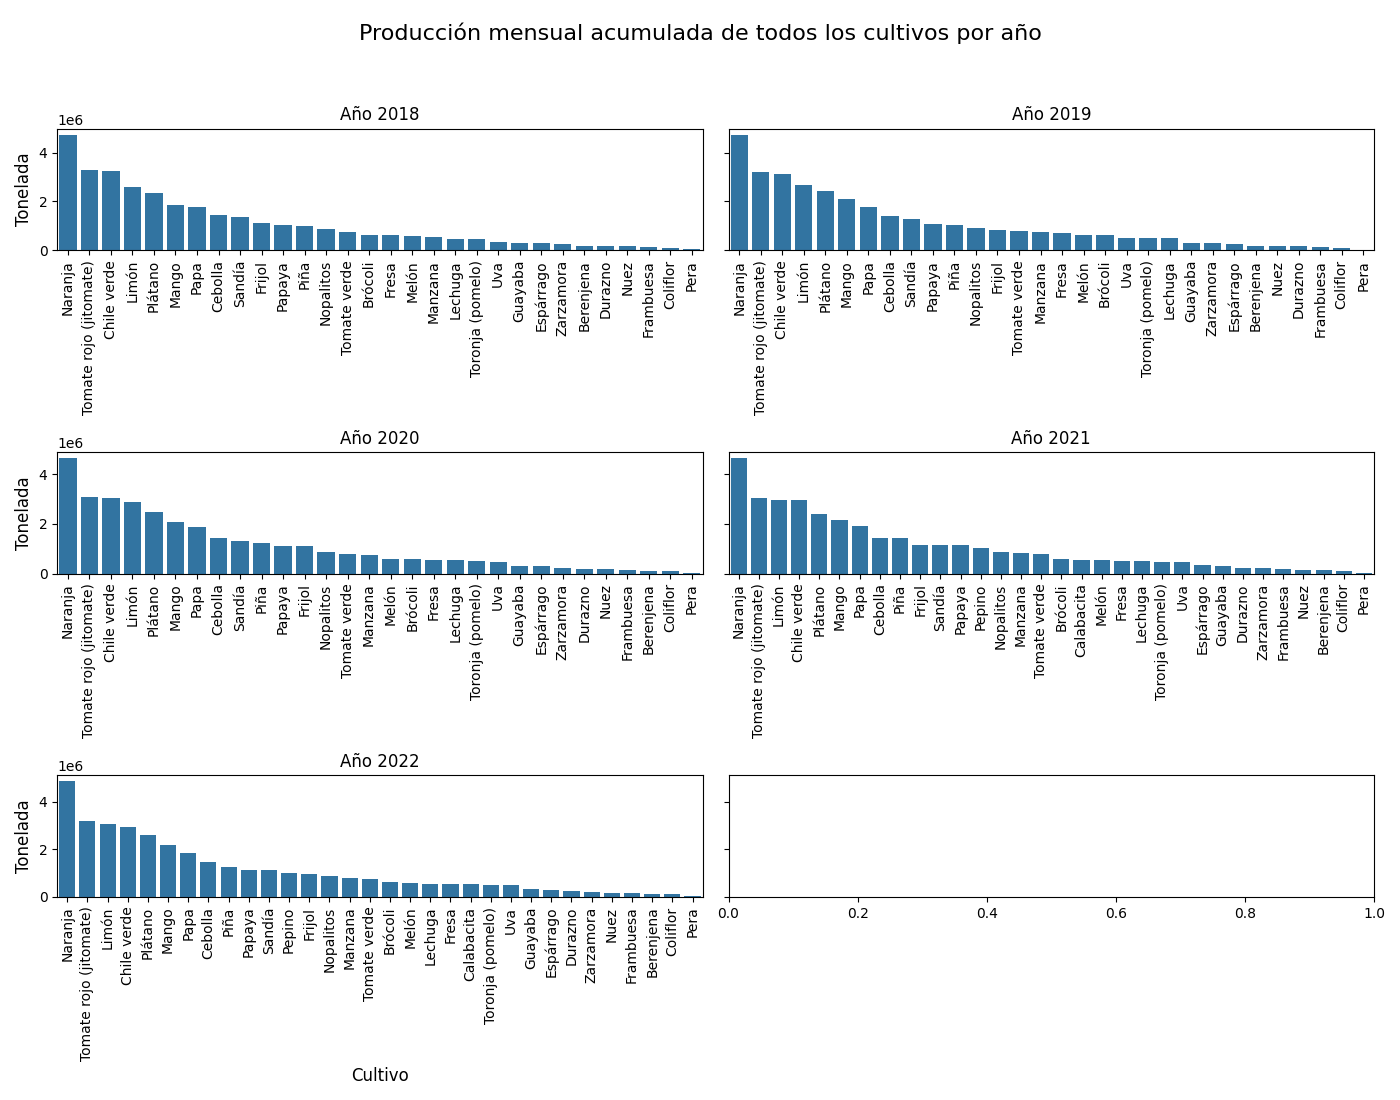

In [28]:
# Crea una figura con una matriz de subgráficas 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 11), sharey='row')
fig.suptitle('Producción mensual acumulada de todos los cultivos por año', fontsize=16)

i=0

# Itera a través de los años y crea una subgráfica para cada uno
for year in prod_año_cult.index.get_level_values('Anio').unique():
    row, col = i // 2, i % 2  # Calcula la fila y la columna actual en la matriz de subgráficas
    ax = axes[row, col]  # Selecciona la subgráfica actual
    
    # Filtra los datos para el año actual y reordena los meses cronológicamente
    df_year = prod_año_cult.loc[year].sort_values(ascending=False)
    
    # Crea un gráfico de barras en la subgráfica actual
    sns.barplot(x=df_year.index, y=df_year.values, ci=None, ax=ax)
    
    # Personaliza la subgráfica
    ax.set_title(f'Año {year}')
    
    # Agrega etiquetas en el eje Y solo a las gráficas de la izquierda
    if col == 0:
        ax.set_ylabel('Tonelada', fontsize=12)

    # Agrega etiquetas en el eje X solo a las gráficas de abajo
    if row == 2:
        ax.set_xlabel('Cultivo', fontsize=12)
    else:
        ax.set_xlabel('', fontsize=12)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rota las etiquetas del eje X

    i+=1
    
# Ajusta el diseño de las subgráficas
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Muestra la figura
plt.show()

## SNIIM

### Cargamos los datos tidy

In [29]:
# Path al archivo parquet
url_sniim = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Primera parte\Tidy\SNIIM.parquet'
# Cargar archivo parquet como DataFrame
df_sniim = pd.read_parquet(url_sniim)
# Inspeccionar primeros elementos del DataFrame
df_sniim.head()

,Fecha,Presentacion,Origen,Destino,Precio Minimo,Precio Maximo,Precio Frecuente,Observacion,Cultivo
0,02/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
1,03/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
2,04/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
3,05/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
4,08/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,nan,acelga_primera


In [30]:
# Cambiar el nombre de las columnas al mismo formato que utilizan los datos del SIAP 
df_sniim = df_sniim.rename(columns={'Precio_min':'Precio Minimo', 'Precio_max':'Precio Maximo', 'precio_frec':'Precio Frecuente'})
# Inspeccionar primeros elementos del DataFrame
df_sniim.head()

,Fecha,Presentacion,Origen,Destino,Precio Minimo,Precio Maximo,Precio Frecuente,Observacion,Cultivo
0,02/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
1,03/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
2,04/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
3,05/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,Rollo de 2k,acelga_primera
4,08/01/2018,Rollo,Puebla,"Baja California : Central de Abasto INDIA, Tij...",16.0,16.0,16.0,nan,acelga_primera


### Dimensiones de nuestros datos

In [31]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_sniim.shape}")

Dimensión de los datos: (900763, 9)


### Tipo de dato de cada variable

In [32]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_sniim.dtypes}\n")

Tipo de dato de cada variable:
 Fecha                object
Presentacion         object
Origen               object
Destino              object
Precio Minimo       float64
Precio Maximo       float64
Precio Frecuente    float64
Observacion          object
Cultivo              object
dtype: object



Convertimos la variable *Fecha* a *datetime*

In [33]:
# Efectuar conversión especificando el formato específico de la fecha
df_sniim['Fecha'] = pd.to_datetime(df_sniim['Fecha'], format="%d/%m/%Y")
# Inspeccionar nuevamente el tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df_sniim.dtypes}\n")

Tipo de dato de cada variable:
 Fecha               datetime64[ns]
Presentacion                object
Origen                      object
Destino                     object
Precio Minimo              float64
Precio Maximo              float64
Precio Frecuente           float64
Observacion                 object
Cultivo                     object
dtype: object



### Estadísticos descriptivos de nuestros datos

In [34]:
# Estadísticos descriptivos ignorando la columna Anio
df_sniim.loc[:, df_sniim.columns != 'Fecha'].describe().applymap('{:,.2f}'.format)

,Precio Minimo,Precio Maximo,Precio Frecuente
count,"900,763.00","900,763.00","900,763.00"
mean,30.34,33.54,32.06
std,34.77,37.54,36.08
min,0.25,0.30,0.00
25%,10.92,12.00,11.72
50%,18.00,20.00,19.00
75%,35.00,40.00,37.80
max,400.00,"3,030.00",400.00


### Valores faltantes

In [35]:
# Valores faltantes
print(f"Valores faltantes:\n {df_sniim.isna().sum()}")

Valores faltantes:
 Fecha               0
Presentacion        0
Origen              0
Destino             0
Precio Minimo       0
Precio Maximo       0
Precio Frecuente    0
Observacion         0
Cultivo             0
dtype: int64


### Datos repetidos

In [36]:
# Filas repetidas
print(f"Cantidad de filas repetidas: {df_sniim.duplicated().sum()}")

Cantidad de filas repetidas: 0


### Filtrar DataFrame por cultivos de interés

Para esto debemos tomar como referencia la lista de cultivos ofrecida por el experto de la red BAMX.

In [37]:
# Inspeccionamos nuevamente algunos elementos de la lista de cultivos
cultivos[:10]

['Tomate rojo (jitomate)',
 'Chile verde',
 'Limón',
 'Pepino',
 'Plátano',
 'Mango',
 'Garbanzo',
 'Brócoli',
 'Cebolla',
 'Sandía']

Ahora inspeccionamos los cultivos de los datos del SNIIM.

In [38]:
# Inspeccionar algunos nombres de cultivos
df_sniim['Cultivo'].sample(n=10)

195286           chile guajillo_primera
354624             elote grande_primera
185239      chile de árbol seco_primera
887788        zanahoria mediana_primera
850092                uva globo_primera
659299           papaya maradol_primera
250016            chile serrano_primera
110380          cebolla de rabo_primera
211025            chile húngaro_primera
583896    melón cantaloupe # 23_primera
Name: Cultivo, dtype: object

El formato consiste en el nombre de los cultivos seguido por una descripción de la variedad.
Debido a que en el SIAP no se maneja variedad, para poder homologar los datos nos quedamos solamente con el nombre de los cultivos. No obstante, esto aplica solo para los cultivos cuyo nombre consiste en una sola palabra. Para los nombres con más palabras utilizamos un abordaje manual. 

In [39]:
# Nombres de cultivo con más de una palabra
[cultivo for cultivo in cultivos if len(cultivo.split(' ')) > 1]

['Tomate rojo (jitomate)', 'Chile verde', 'Tomate verde', 'Toronja (pomelo)']

**Tomate rojo (jitomate)**

Reemplazamos los cultivos "tomate bola_primera" y "tomate saladette_primera"

In [40]:
# Seleccionar filas que cumplan con la condición
condicion = df_sniim['Cultivo'].isin(['tomate bola_primera', 'tomate saladette_primera'])

# Modificar los valores en esas filas
df_sniim.loc[condicion, 'Cultivo'] = 'Tomate rojo (jitomate)'

**Tomate verde**

Reemplazamos el cultivo "tomate verde_primera"

In [41]:
# Seleccionar filas que cumplan con la condición
condicion = df_sniim['Cultivo'] == 'tomate verde_primera'

# Modificar los valores en esas filas
df_sniim.loc[condicion, 'Cultivo'] = 'Tomate verde'

**Toronja (pomelo)**

Reemplazamos el cultivo "toronja blanca_primera", "toronja roja mediana_primera", "toronja roja_primera" y "toronja rosada_primera"

In [42]:
# Seleccionar filas que cumplan con la condición
condicion = df_sniim['Cultivo'].isin(["toronja blanca_primera", "toronja roja mediana_primera", "toronja roja_primera", "toronja rosada_primera"])

# Modificar los valores en esas filas
df_sniim.loc[condicion, 'Cultivo'] = 'Toronja (pomelo)'

**Chile verde**

Reemplazamos los cultivos 'chile ancho_primera', 'chile caloro_primera', 'chile caribe_primera', 'chile cat_primera', 'chile guajillo_primera',
       'chile húngaro_primera',
       'chile mirasol_primera',
       'chile puya fresco_primera',
       'chile puya seco_primera'

**'chile pimiento morrón_primera'**
**'chile pasilla_primera'**
**'chile de árbol seco_primera'**
**'chile de árbol fresco_primera'**
**'chile dulce_primera'**

In [43]:
# Seleccionar filas que cumplan con la condición
condicion = df_sniim['Cultivo'].isin(['chile anaheim_primera', 'chile california_primera', 'chile chilaca_primera', 'chile serrano_primera', 'chile poblano_primera',
                                       'chile jalapeño_primera', 'chile habanero_primera'])

# Modificar los valores en esas filas
df_sniim.loc[condicion, 'Cultivo'] = 'Chile verde'

**Nopalitos**

Otro cultivo a tomar en cuenta son los Nopalitos que en el SNIIM vienen solamente como Nopal

In [44]:
# Seleccionar filas que cumplan con la condición
condicion = df_sniim['Cultivo'].isin(['nopal grande_primera', 'nopal_primera'])

# Modificar los valores en esas filas
df_sniim.loc[condicion, 'Cultivo'] = 'Nopalitos'

Ahora sí reemplazamos los nombres de cultivo conformados por una sola palabra

In [45]:
# Condición para ignorar los cultivos que ya modificamos
condicion = ~df_sniim['Cultivo'].isin(['Tomate rojo (jitomate)', 'Tomate verde', 'Toronja (pomelo)', 'Nopalitos', 'Chile verde'])

# Expresión regular para capturar la primera palabra
pattern = r'^([^\W_]+)'

# Aplicar la expresión regular para mantener solo la primera palabra
df_sniim.loc[condicion, 'Cultivo'] = df_sniim[condicion]['Cultivo'].str.extract(pattern).values

# Reemplazar la primera letra por mayúscula
df_sniim.loc[condicion, 'Cultivo'] = df_sniim.loc[condicion, 'Cultivo'].str.title()

# Inspeccionar nuevamente algunos nombres de cultivos
df_sniim['Cultivo'].sample(n=10)

491144          Limón
591667          Melón
492611          Limón
140847    Chile verde
281127        Ciruela
75498      Calabacita
758073        Plátano
638899           Nuez
72970      Calabacita
328304        Durazno
Name: Cultivo, dtype: object

Utilizamos nuevamente la lista de cultivos para filtrar el DataFrame

In [46]:
# Filtramos el DataFrame para quedarnos solo con los cultivos de interés
df_sniim = df_sniim[df_sniim['Cultivo'].isin(cultivos)]

# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df_sniim.shape}")

Dimensión de los datos: (508186, 9)


In [47]:
print(f"Cantidad de cultivos de Everardo: {len(cultivos)}")

x = 0 
for cultivo in df_sniim['Cultivo'].unique():
    if cultivo in cultivos:
        x+=1

print(f"Cantidad de cultivos del sniim que están en cultivos de Everardo: {x}")

Cantidad de cultivos de Everardo: 33
Cantidad de cultivos del sniim que están en cultivos de Everardo: 30


In [48]:
print(f"Cultivos de Everardo que no están en los del sniim: \n")

for cultivo in cultivos:
    if cultivo not in df_sniim['Cultivo'].unique():
        print(cultivo)

Cultivos de Everardo que no están en los del sniim: 

Garbanzo
Frambuesa
Frijol


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Sample DataFrame
data = {
    'Anio': [2018, 2018, 2018, 2018, 2023, 2023, 2023, 2023],
    'Mes': ['Abril', 'Agosto', 'Diciembre', 'Enero', 'Julio', 'Junio', 'Marzo', 'Mayo'],
    'Value': [10165366.29, 21711429.80, 32612489.63, 1842999.69, 21669332.78, 18830705.91, 8737073.24, 15518996.40]
}

df = pd.DataFrame(data)

# Function to update the bar plot
def update_bar_plot(selected_year):
    plt.figure(figsize=(10, 6))
    filtered_df = df[df['Anio'] == selected_year]
    plt.bar(filtered_df['Mes'], filtered_df['Value'])
    plt.title(f'Bar Plot for {selected_year}')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()

# Create an interactive widget to select the year
year_selector = widgets.Dropdown(options=df['Anio'].unique(), description='Select Year:')

# Use the interact function to control widget placement
output = widgets.interactive(update_bar_plot, selected_year=year_selector)
display(output)


interactive(children=(Dropdown(description='Select Year:', options=(2018, 2023), value=2018), Output()), _dom_…